[[5947 2573]
 [ 381 1099]] 
               precision    recall  f1-score   support

           0       0.94      0.70      0.80      8520
           1       0.30      0.74      0.43      1480

    accuracy                           0.70     10000
   macro avg       0.62      0.72      0.61     10000
weighted avg       0.84      0.70      0.75     10000
 
 0.7202861312016242 0.6850374425270791
                      Feature  Coefficient
733              route_PENTPE     0.429977
7             flight_duration     0.343872
22               route_AKLKUL     0.333869
486              route_JHBKTM     0.245195
445              route_ICNPEN     0.239447
..                        ...          ...
8        sales_channel_Mobile    -0.249469
638              route_MELMRU    -0.254396
474              route_IKASYD    -0.286124
818  booking_origin_Australia    -0.436886
296              route_DELSYD    -0.447319

[918 rows x 2 columns]


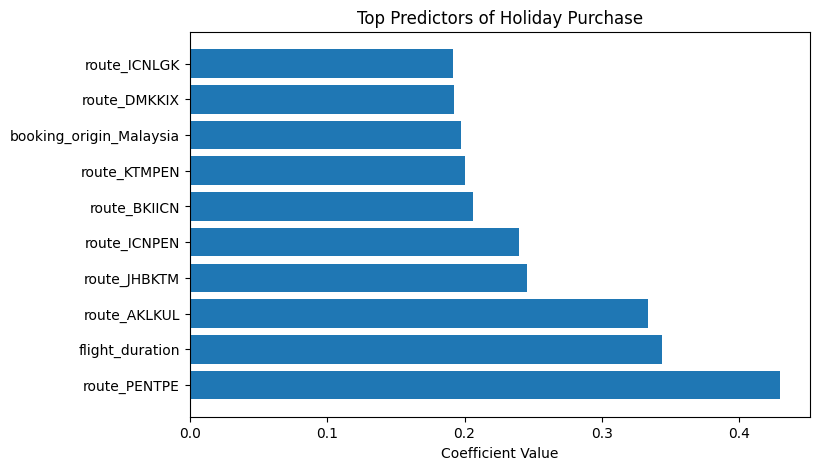

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score



df = pd.read_csv("data\customer_booking.csv", encoding="latin1")
# print(df)
# print(df.info()) #no nulls
# print(df.describe())
# print(df["booking_complete"].value_counts())

X = df.drop(columns=["booking_complete"])
X = pd.get_dummies(X, drop_first=True)
y = df["booking_complete"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
logic_model = LogisticRegression(
    solver="liblinear",      # 🔑 KEY CHANGE
    max_iter=1000,
    class_weight="balanced",
    random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logic_model.fit(X_train_scaled, y_train)
y_pred = logic_model.predict(X_test_scaled)

cv_auc = cross_val_score(
    logic_model, X, y, cv=5, scoring="roc_auc"
)

print(confusion_matrix(y_test, y_pred), "\n" , 
      classification_report(y_test, y_pred), "\n", 
      roc_auc_score(y_test, y_pred), "\n"
      cv_auc.mean()
      )

feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logic_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(feature_importance)


top_features = feature_importance.head(10)
plt.figure(figsize=(8,5))
plt.barh(top_features["Feature"], top_features["Coefficient"])
plt.title("Top Predictors of Holiday Purchase")
plt.xlabel("Coefficient Value")
plt.show()


Logistic Regression was selected due to its interpretability and strong performance under class imbalance. Feature scaling and class weighting were applied to ensure stable convergence and meaningful predictions.

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred), "\n" , 
      classification_report(y_test, y_pred), "\n", 
      roc_auc_score(y_test, y_pred))


[[8372  148]
 [1296  184]] 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.12      0.20      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.55      0.56     10000
weighted avg       0.82      0.86      0.81     10000
 
 0.5534767161527724
